In [ ]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import Ridge  # Example of adding Ridge regularization
from sklearn.model_selection import GridSearchCV
# data imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.preprocessing import OneHotEncoder
from matplotlib.ticker import ScalarFormatter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score

# pipeline imports
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [ ]:
ufc = pd.read_csv("/content/ufc-fighters-statistics 2.csv")
rows = len(ufc.axes[0])
print(rows)
ufc.dropna(inplace = True)
ufc.reset_index(inplace = True)

4111


In [ ]:
ufc['win rate'] = (ufc['wins'])/(ufc['wins']+ufc['losses']+ufc['draws'])

In [ ]:
ufc.head()

,index,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,win rate
0,4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0.800000
1,22,Dione Barbosa,The Witch,6,2,0,167.64,56.70,167.64,Orthodox,1992-05-08,0.87,50.0,0.65,66.0,3.27,100.0,0.0,9.8,0.750000
2,23,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8,0.857143
3,53,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1,0.545455
4,59,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4,0.555556


Question 1:

In [ ]:
predictors = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "stance"]

contin = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence"]

X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["stance"]),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010264608560681315
MSE :  0.010438796870693625
R2 :  0.126377994864313
R2 :  0.1358855174240171


In [ ]:
#No sig strike per min
predictors = ["significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "stance"]

contin = ["significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence"]

X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["stance"]),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010597953076272731
MSE :  0.011726047570507206
R2 :  0.09800700512901339
R2 :  0.029328029411409107


In [ ]:
#No sig strike accuracy
predictors = ["significant_strikes_landed_per_minute", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "stance"]

contin = ["significant_strikes_landed_per_minute", "significant_strikes_absorbed_per_minute", "significant_strike_defence"]
X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["stance"]),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010618777092577877
MSE :  0.0102997797622285
R2 :  0.09623467072659253
R2 :  0.1473932321768351


In [ ]:
#No strike absorbed
predictors = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strike_defence", "stance"]

contin = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strike_defence"]


X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["stance"]),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010516965429058596
MSE :  0.01126682671498458
R2 :  0.10489987301892534
R2 :  0.06734193052218596


In [ ]:
#No sig strike def
predictors = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "stance"]

contin = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute"]

X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["stance"]),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010371838964824184
MSE :  0.010788996603396519
R2 :  0.1172516029395746
R2 :  0.10689628958758135


In [ ]:
predictors = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence"]

contin = ["significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence"]

X = ufc[predictors]
y = ufc["win rate"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 100)

# Create Empty Model
z = make_column_transformer((StandardScaler(), contin),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2, include_bias=False),),
                ("linearregression", lr)])

# fit
pipe.fit(X_train, y_train)

# predict

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("R2 : ", r2_score(y_train,y_pred_train))
print("R2 : ", r2_score(y_test,y_pred_test))

MSE :  0.010329815909937177
MSE :  0.010486640704079425
R2 :  0.1208281899331537
R2 :  0.13192504670667904


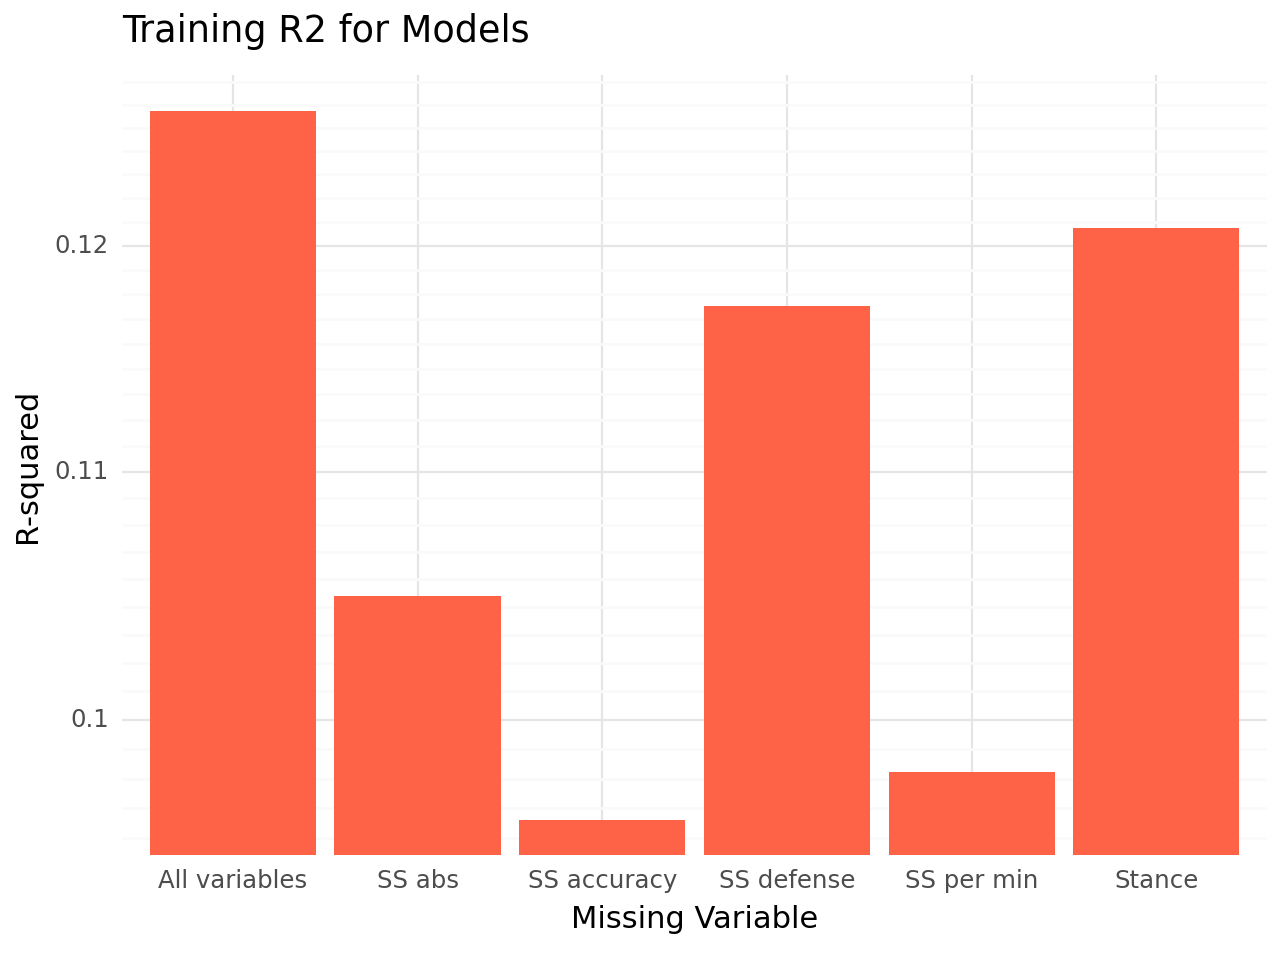

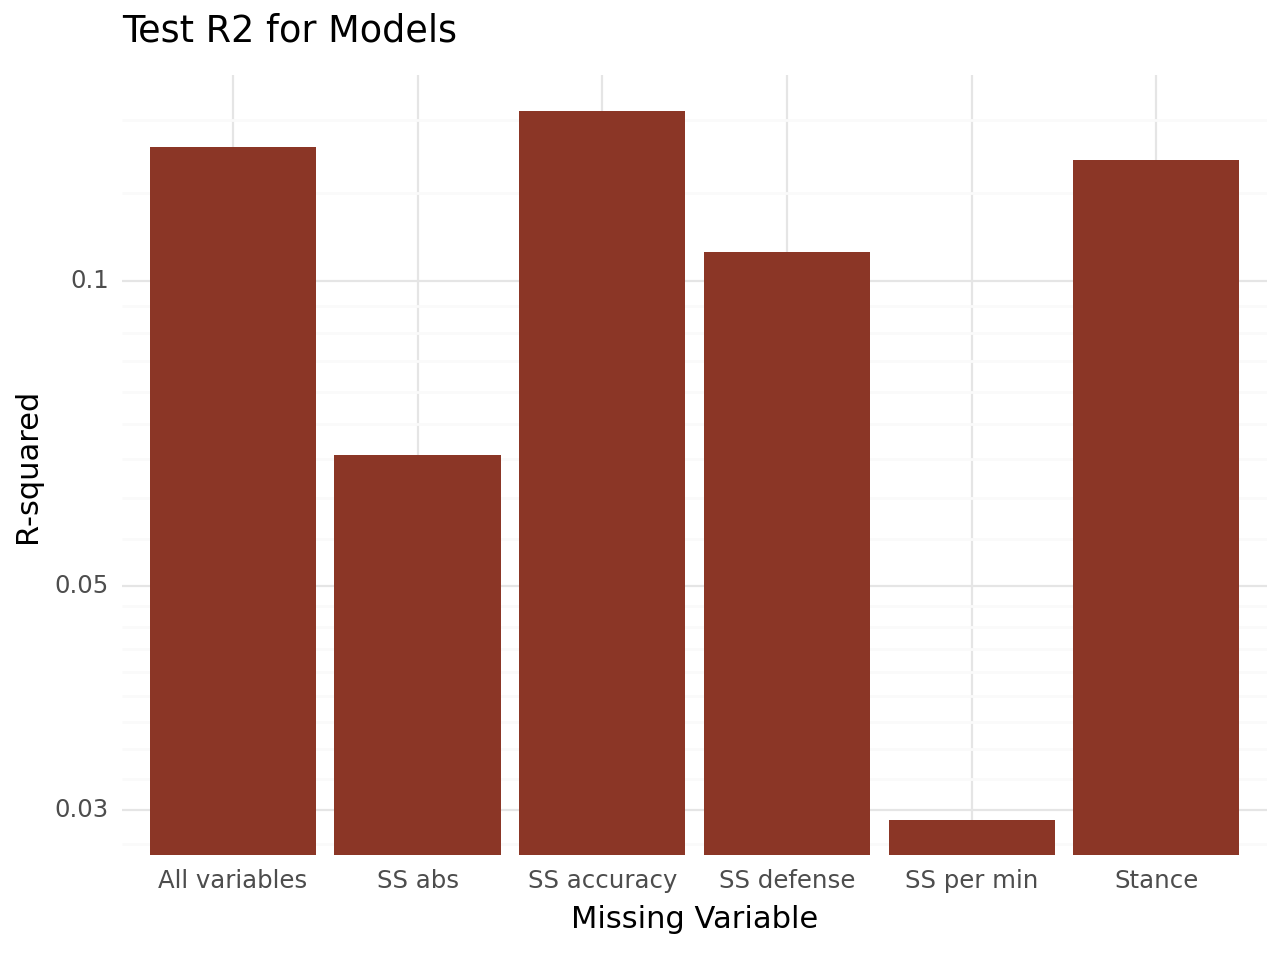

In [ ]:

# Define the data
data = pd.DataFrame({
    'Model': ['All variables', 'SS per min', 'SS accuracy', 'SS abs', 'SS defense', 'Stance'],
    'R2_Train': [0.126377994864313, 0.09800700512901339, 0.09623467072659253, 0.10489987301892534, 0.1172516029395746, 0.1208281899331537],
    'R2_Test': [0.1358855174240171, 0.029328029411409107, 0.1473932321768351, 0.06734193052218596, 0.10689628958758135, 0.13192504670667904]
})

# Create bar plot for training R2
plot_train = (
    ggplot(data, aes(x='Model', y='R2_Train'))
    + geom_bar(stat='identity', fill='#FF6347')
    + scale_y_log10()  # Log scale for better visualization
    + theme_minimal()
    + ggtitle('Training R2 for Models')
    + ylab('R-squared')
    + xlab('Missing Variable')
)

# Display the plot for training R2
print(plot_train)

# Create bar plot for test R2
plot_test = (
    ggplot(data, aes(x='Model', y='R2_Test'))
    + geom_bar(stat='identity', fill='#8B3626')
    + scale_y_log10()  # Log scale for better visualization
    + theme_minimal()
    + ggtitle('Test R2 for Models')
    + ylab('R-squared')
    + xlab('Missing Variable')
)

# Display the plot for test R2
print(plot_test)


Question 2:

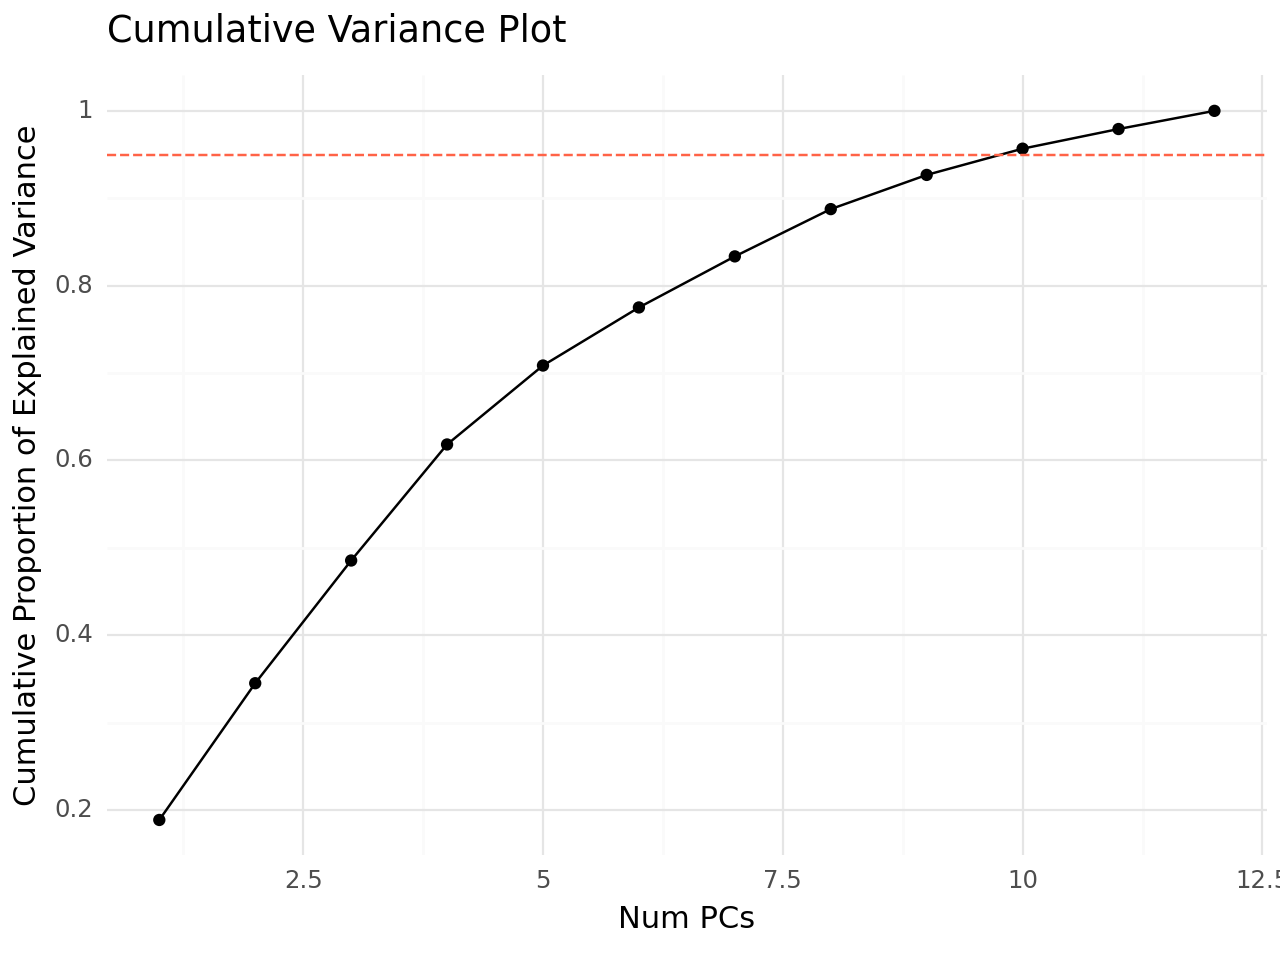

In [ ]:
predictors = ["wins", "losses", "reach_in_cm", "weight_in_kg", "significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "average_takedowns_landed_per_15_minutes",	"takedown_accuracy",	"takedown_defense",	"average_submissions_attempted_per_15_minutes"]
X = ufc[predictors]
y = ufc["height_cm"]

# tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# empty pipeline
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

pca = PCA()

pipe_pca = Pipeline([
    ("z", z),
    ("pca", pca)
])

# fit
pipe_pca.fit(X_train)

# scree/cumvar plot
pcaDF = pd.DataFrame({"expl_var" :
                      pipe_pca.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,13),
                      "cum_var":
                      pipe_pca.named_steps["pca"].explained_variance_ratio_.cumsum()})

print(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "#FF6347", linetype = "dashed") +
 theme_minimal() + labs(x = "Num PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

In [ ]:
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

pca = PCA(n_components = 10)

pipe_lr = Pipeline([
    ("z", z),
    ("pca", pca),
    ("model", LinearRegression())
])

# fit
pipe_lr.fit(X_train,y_train)
y_pred_train = pipe_lr.predict(X_train)
y_pred_test  = pipe_lr.predict(X_test)

y_pred_train_prob = pipe_lr.predict(X_train)
y_pred_test_prob  = pipe_lr.predict(X_test)

print("MSE train: ", mean_squared_error(y_train,y_pred_train))
print("MSE test: ", mean_squared_error(y_test,y_pred_test))

MSE train:  15.507404227959203
MSE test:  15.771083903142085


In [ ]:
predictors = ["wins", "losses", "reach_in_cm", "weight_in_kg", "significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "average_takedowns_landed_per_15_minutes",	"takedown_accuracy",	"takedown_defense",	"average_submissions_attempted_per_15_minutes"]

X = ufc[predictors]
y = ufc["height_cm"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("z", z),
                ("lr", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Test MSE : ", mean_squared_error(y_test,y_pred_test))

Train MSE :  14.11532038480507
Test MSE :  14.241440473739804


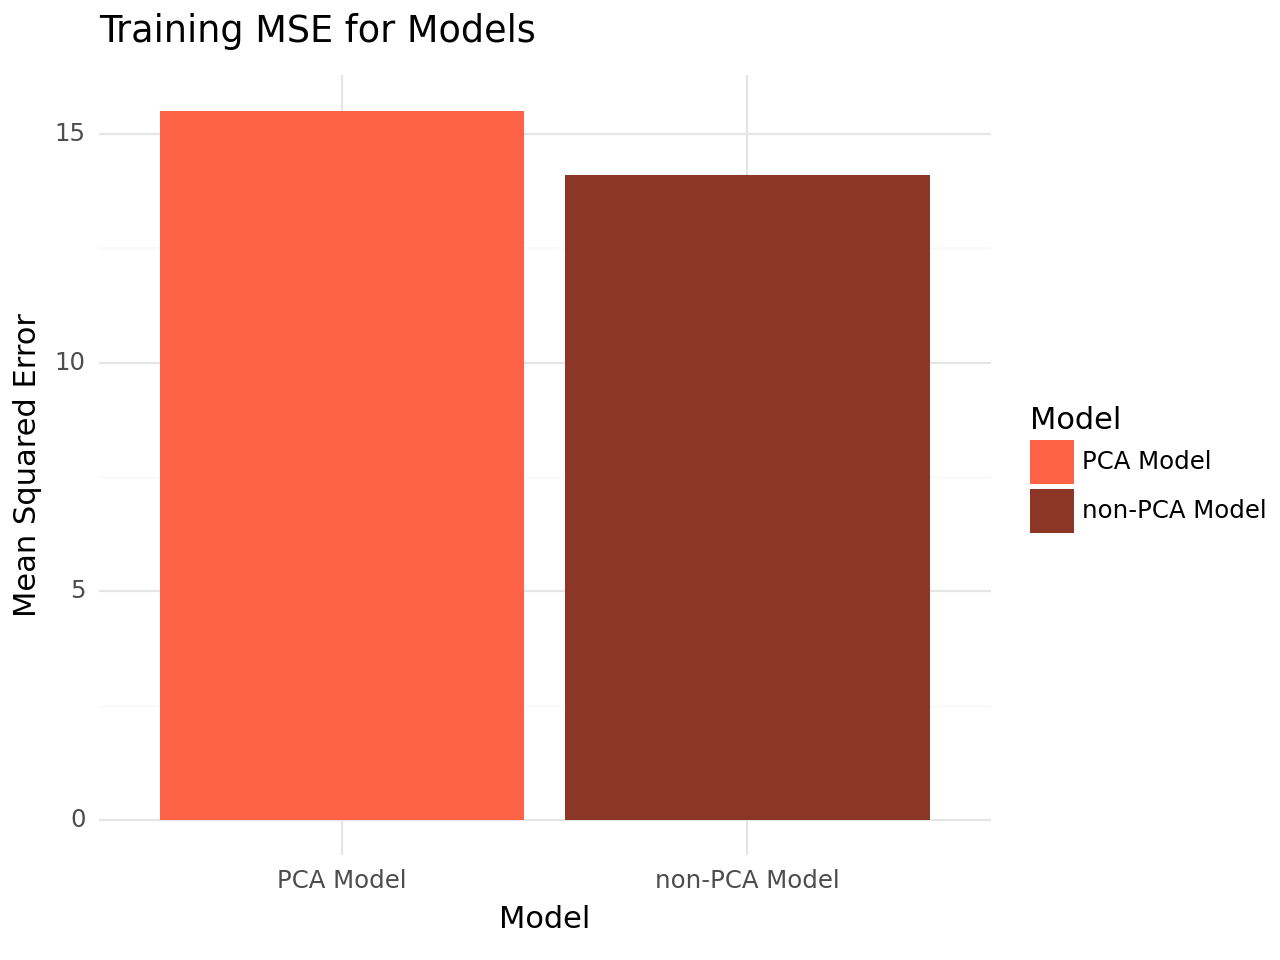

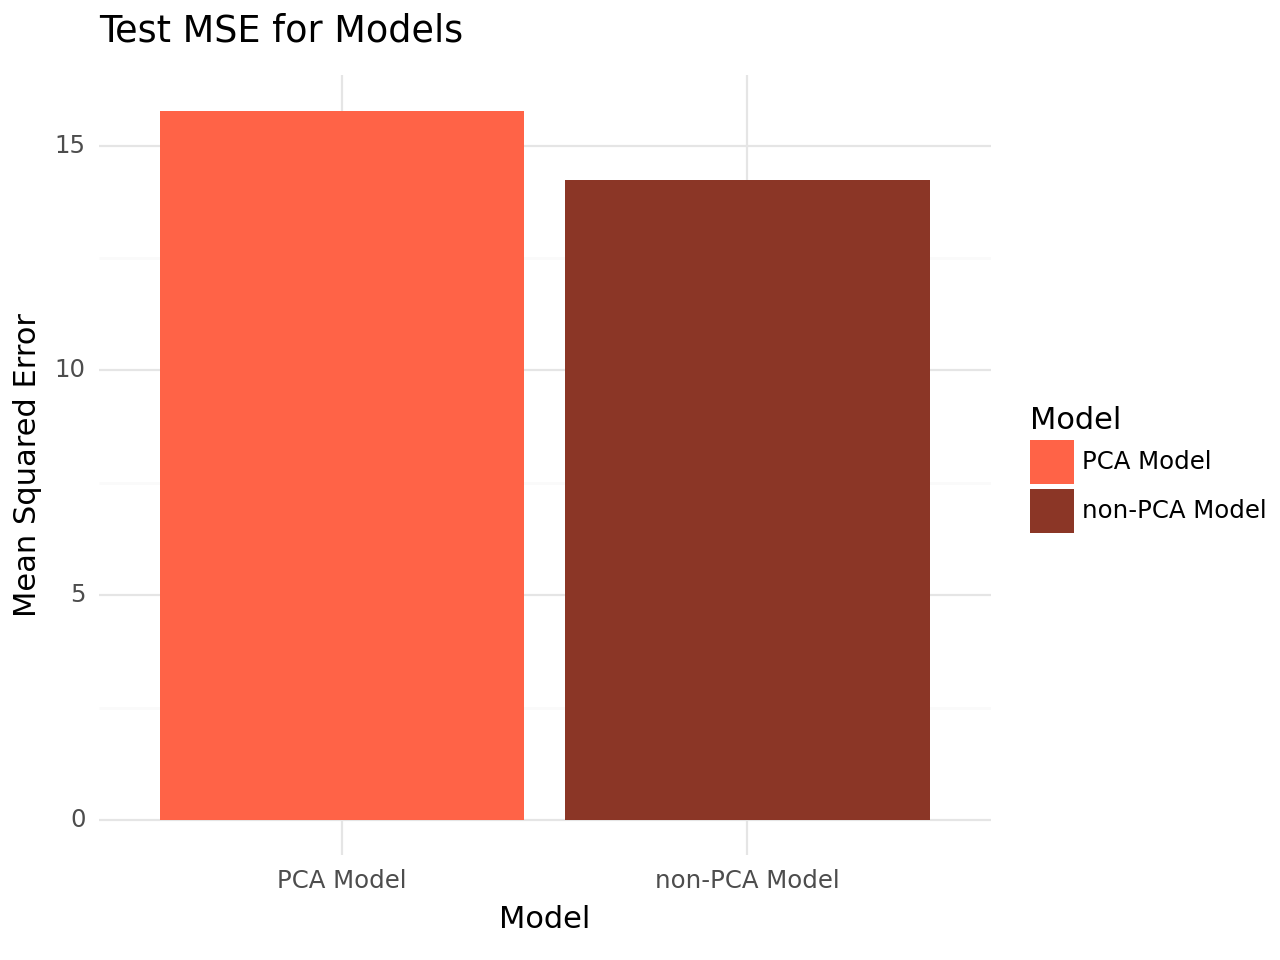

In [ ]:
data = pd.DataFrame({
    'Model': ['PCA Model', 'non-PCA Model'],
    'MSE_Train': [15.507404227959203, 14.11532038480507],
    'MSE_Test': [15.771083903142085, 14.241440473739804]
})

# Create bar plot for training MSE
plot_train = (
    ggplot(data, aes(x='Model', y='MSE_Train', fill='Model'))
    + geom_bar(stat='identity', position='dodge')
    + theme_minimal()
    + scale_fill_manual(values=['#FF6347', '#8B3626'])  # Custom colors
    + ggtitle('Training MSE for Models')
    + ylab('Mean Squared Error')
    + xlab('Model')
)

# Display the plot for training MSE
print(plot_train)

# Create bar plot for test MSE
plot_test = (
    ggplot(data, aes(x='Model', y='MSE_Test', fill='Model'))
    + geom_bar(stat='identity', position='dodge')
    + theme_minimal()
    + scale_fill_manual(values=['#FF6347', '#8B3626'])  # Custom colors
    + ggtitle('Test MSE for Models')
    + ylab('Mean Squared Error')
    + xlab('Model')
)

# Display the plot for test MSE
print(plot_test)

Question 3:

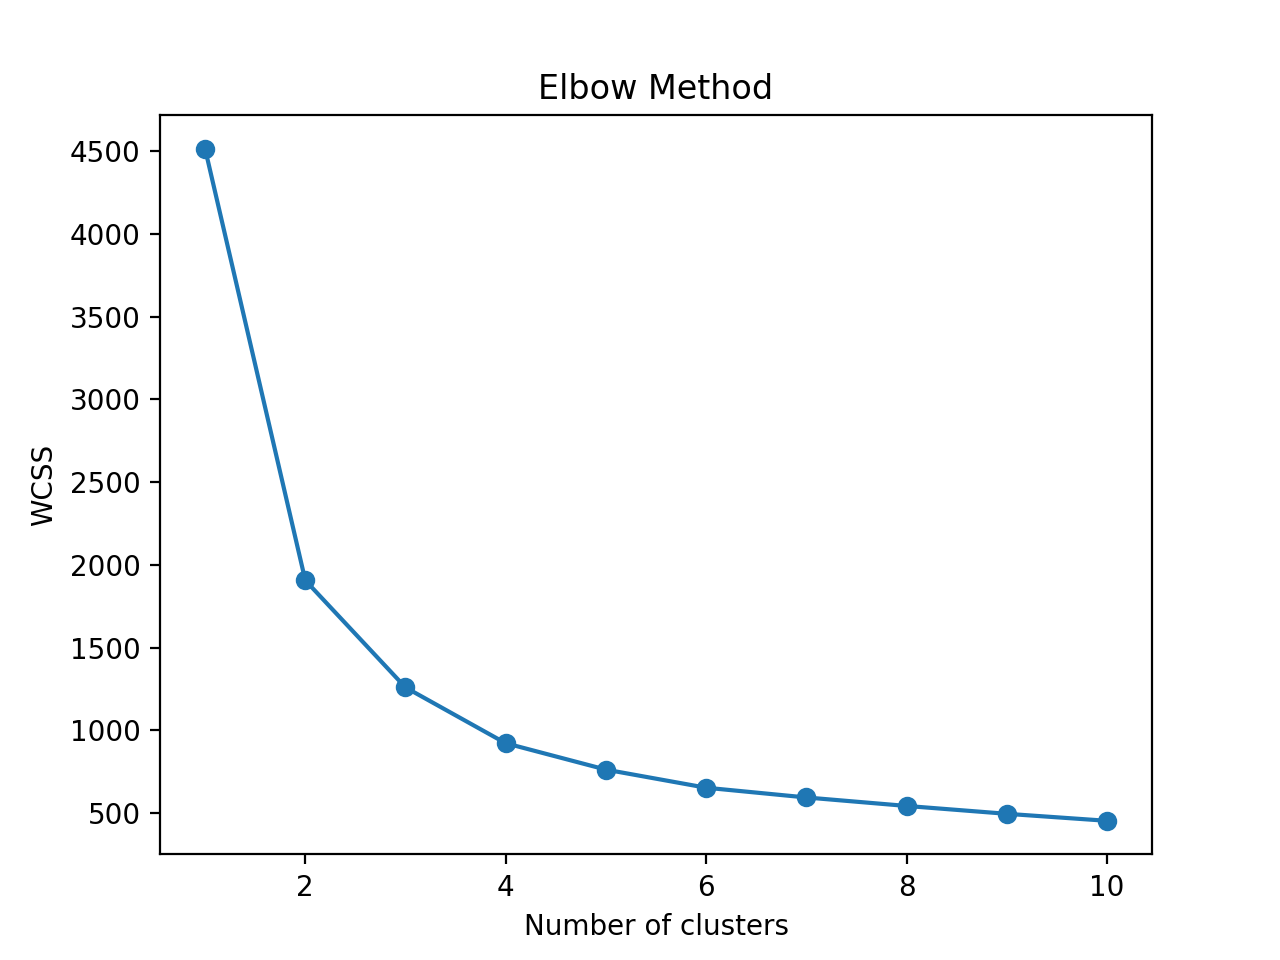

In [ ]:
predictors = ["height_cm", "weight_in_kg", "reach_in_cm"]
X = ufc[predictors]

#### STEP 2. ####
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

#### STEP 3. ####
km = KMeans()
pipe = Pipeline([("z", z), ("clust", km)])


wcss = []  # to store the within-cluster sum of squares
for i in range(1, 11):
    km.n_clusters = i
    pipe.fit(X)
    wcss.append(km.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km2 = KMeans(n_clusters = 4)
pipe = Pipeline([("z", z), ("clust", km2)])
ufc['cluster'] = pipe.fit_predict(X)
#### STEP 4. ####
labels = pipe.fit_predict(X)

#### STEP 5. ####
print(silhouette_score(X, pipe.predict(X)))
X["clusters"] = labels

0.36686133571859414


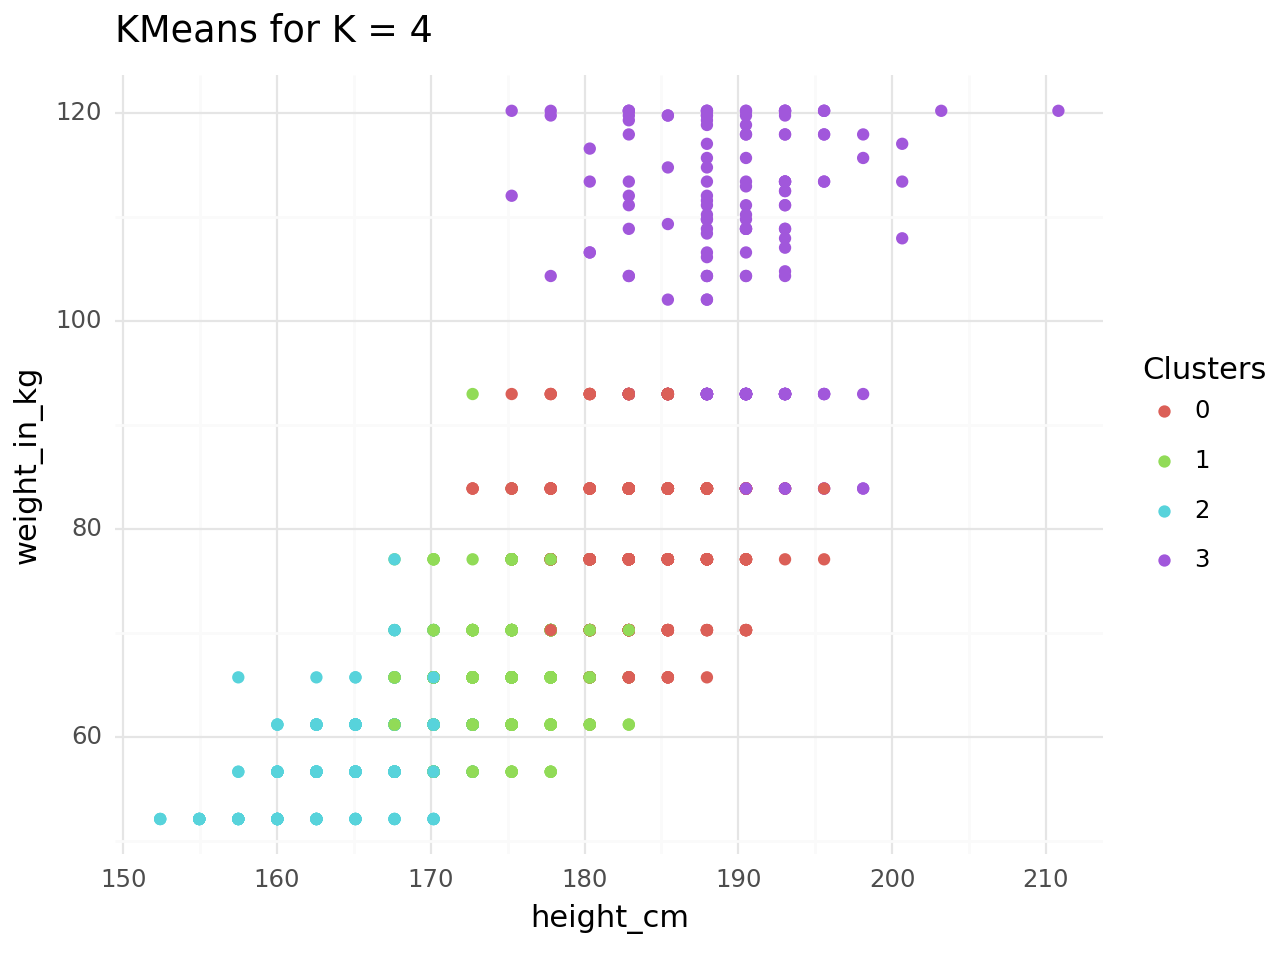

In [ ]:
print(ggplot(X, aes(x = "height_cm", y = "weight_in_kg", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "height_cm", y = "weight_in_kg", title = "KMeans for K = 4",
         color = "Clusters"))

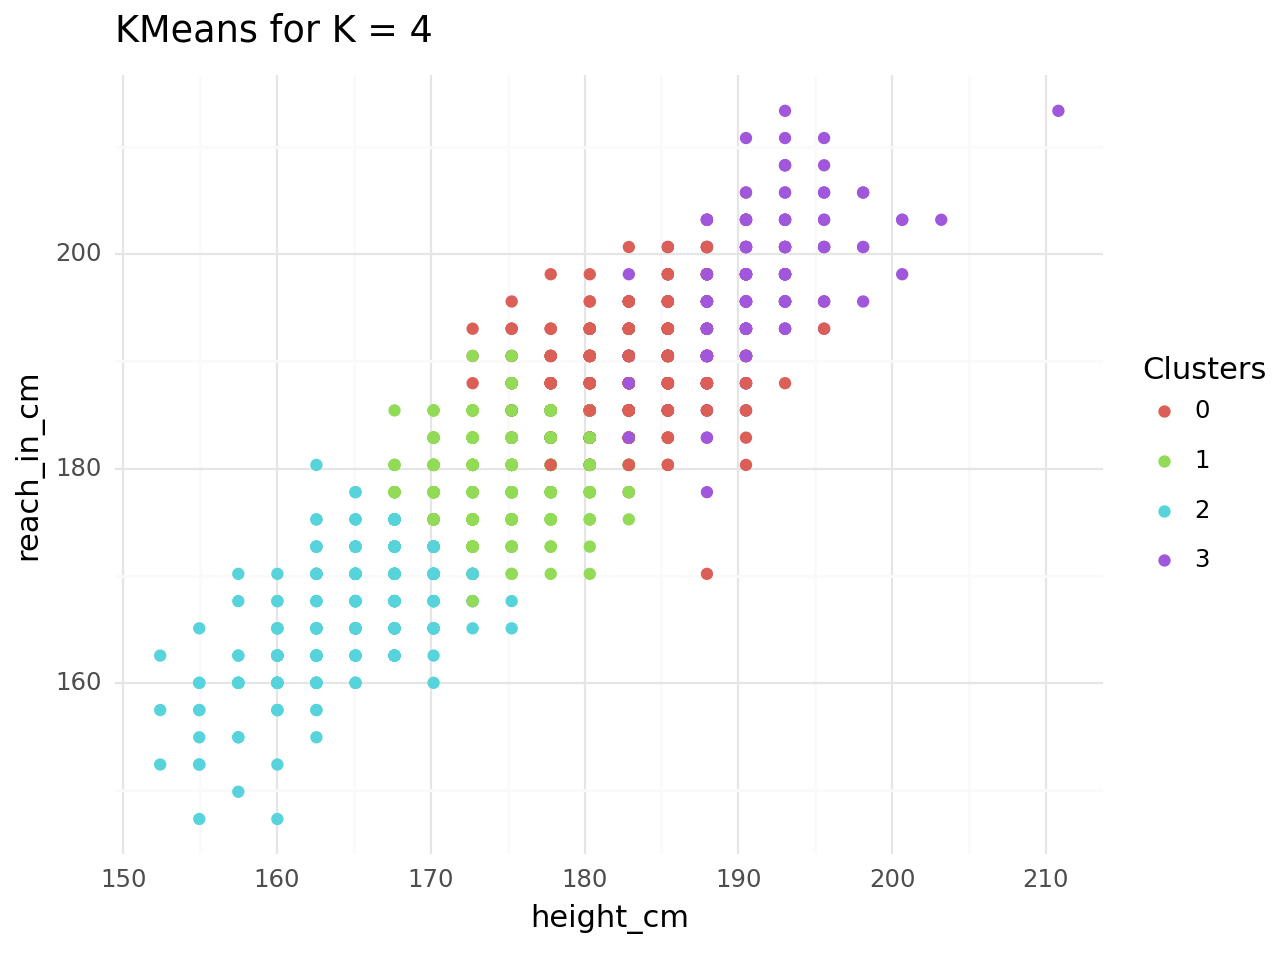

In [ ]:
print(ggplot(X, aes(x = "height_cm", y = "reach_in_cm", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "height_cm", y = "reach_in_cm", title = "KMeans for K = 4",
         color = "Clusters"))

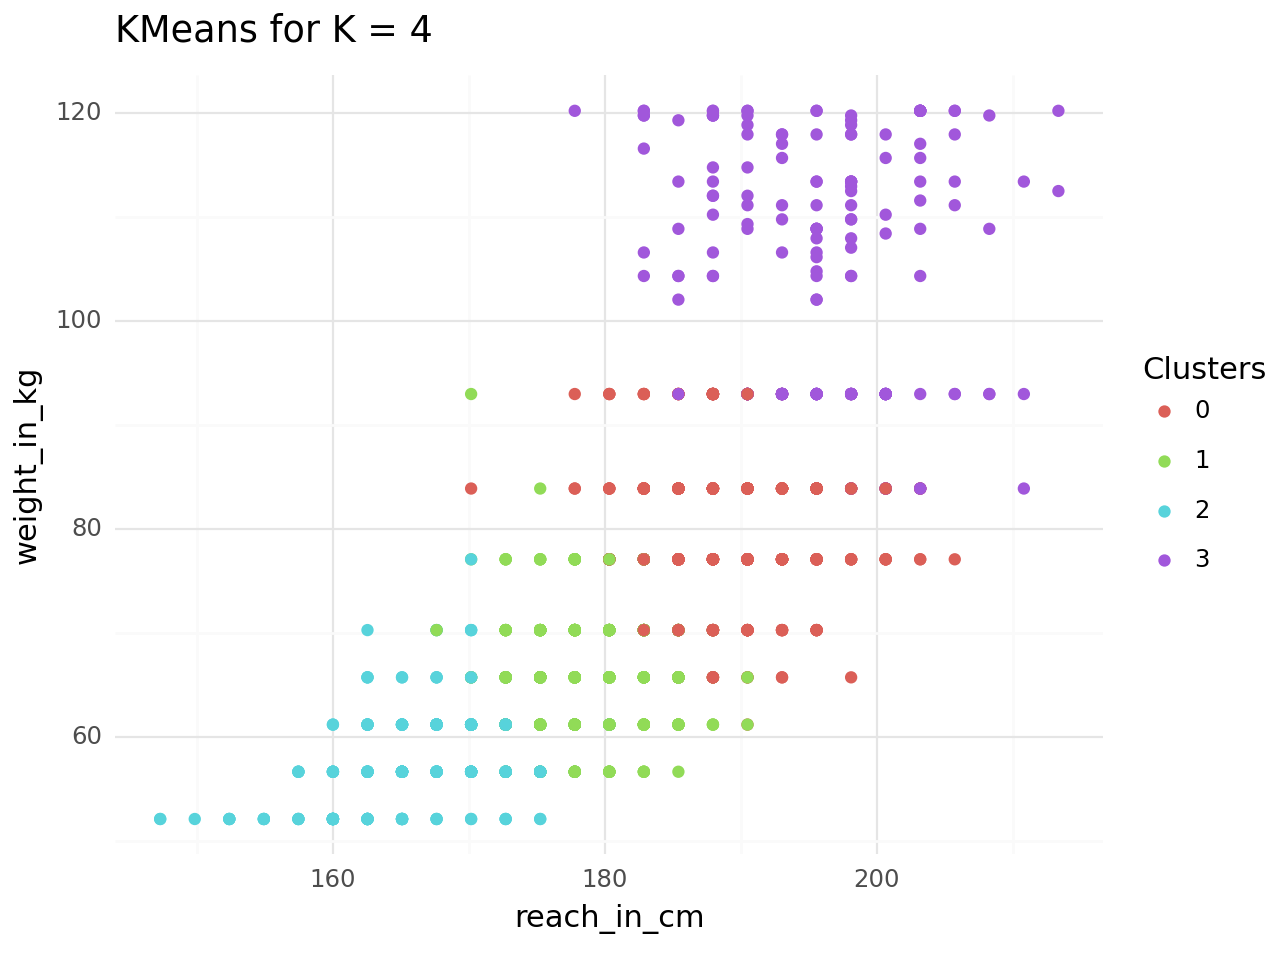

In [ ]:
print(ggplot(X, aes(x = "reach_in_cm", y = "weight_in_kg", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "reach_in_cm", y = "weight_in_kg", title = "KMeans for K = 4",
         color = "Clusters"))

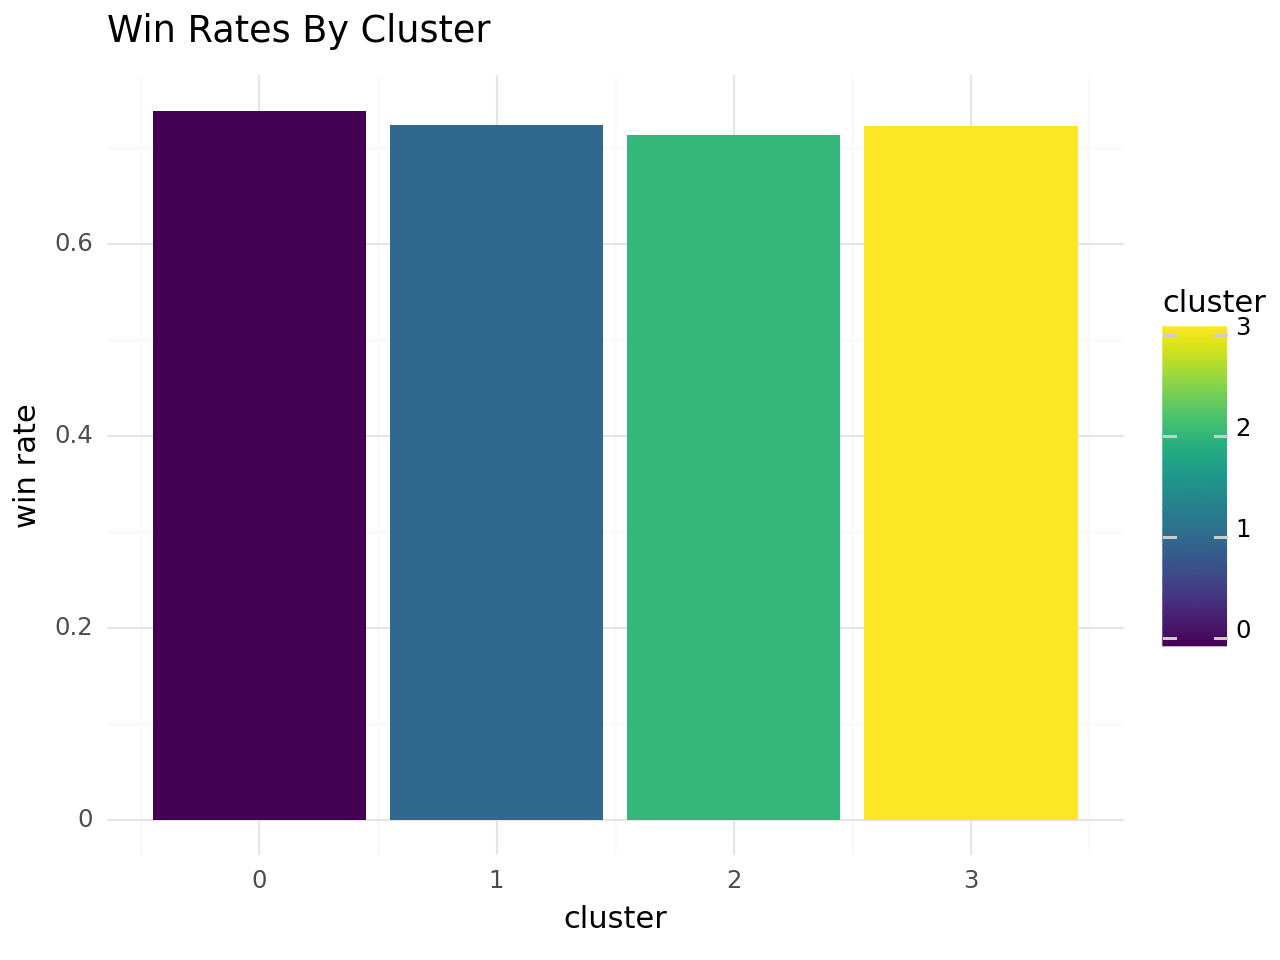

In [ ]:
cluster_win_rates = ufc.groupby('cluster')['win rate'].mean().reset_index()
print(ggplot(cluster_win_rates, aes(x='cluster', y='win rate', fill='cluster'))
    + geom_bar(stat='identity')
    + theme_minimal()
    +labs(title = "Win Rates By Cluster"))